In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['overweight'] = df["weight"] / (df["height"]/100 * df["height"]/100) > 25
df['overweight'] = df["overweight"].map(lambda x: 1 if x else 0) 

print(df)


          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  overweight  
0          0     0       1

In [10]:


# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].map(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].map(lambda x: 0 if x == 1 else 1)


print(df)

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  overweight  
0          0     0       1

Figure(1058.88x500)


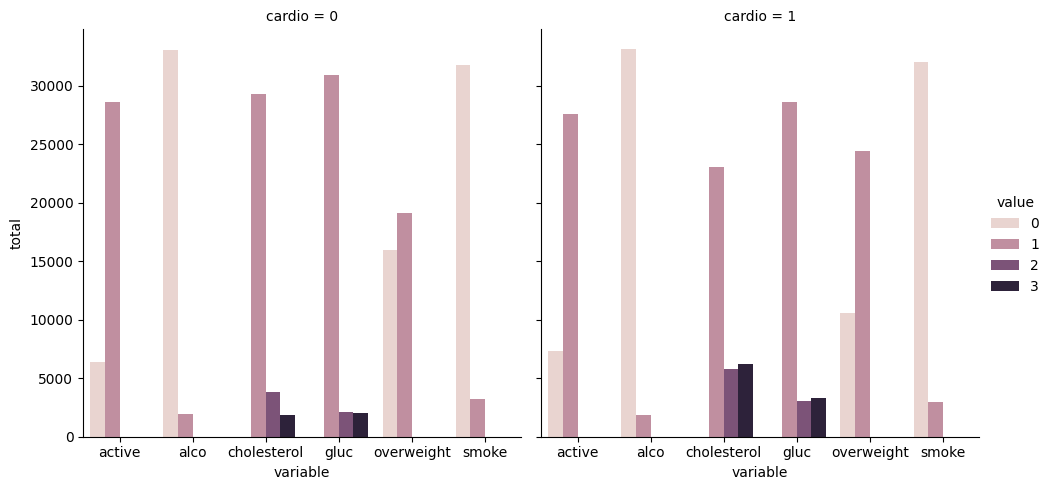

In [87]:

# Draw Categorical Plot
# def draw_cat_plot():
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df,id_vars=["cardio"],value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.sort_values(by="variable")

# Draw the catplot with 'sns.catplot()'
catplot = sns.catplot(data=df_cat,kind="count",col="cardio",x="variable",hue="value",)
catplot.set(ylabel="total")

# Get the figure for the output
fig = catplot.figure
print(fig)

# Do not modify the next two lines
# fig.savefig('catplot.png')
#return fig


          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69993  99991  19699    1     172    70.0    130     90            1     1   
69994  99992  21074    1     165    80.0    150     80            1     1   
69995  99993  19240    2     168    76.0    120     80            1     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  overweight  
0          0     0       1

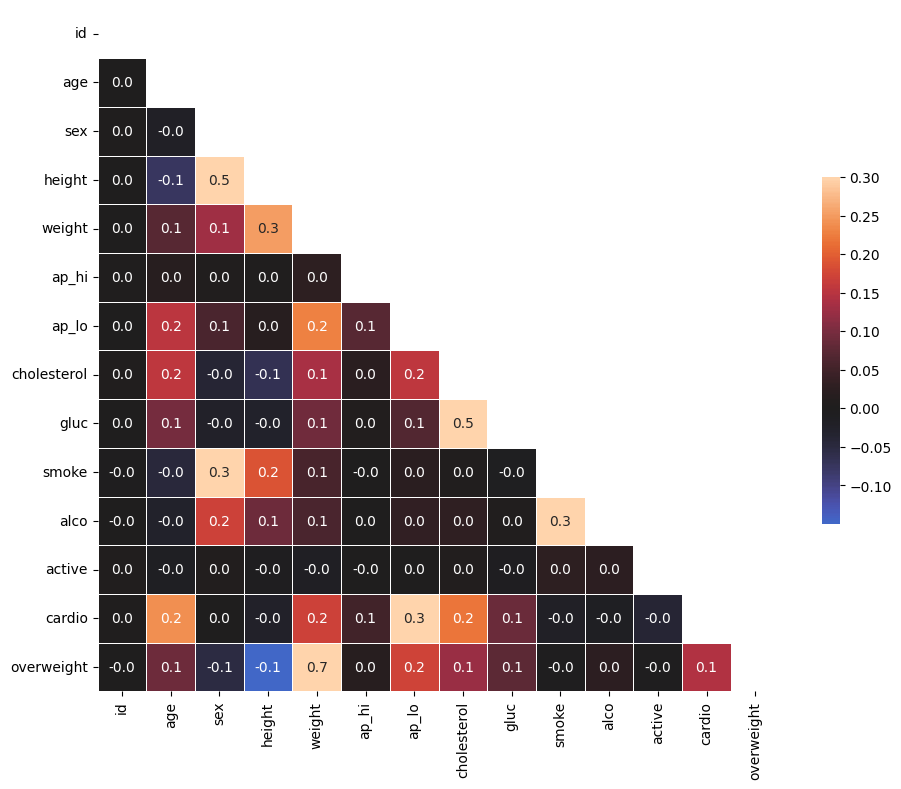

In [83]:


# Clean the data
min_height, max_height = df["height"].quantile(0.025), df['height'].quantile(1-0.025)
min_weight, max_weight = df["weight"].quantile(0.025), df['weight'].quantile(1-0.025)
df_heat = df.query("ap_lo <= ap_hi")
df_heat = df_heat[(df_heat["height"] >= min_height) & (df_heat["height"]<= max_height)]
df_heat = df_heat[(df_heat["weight"] >= min_weight) & (df_heat["weight"]<= max_weight)]

print(df_heat)
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, 
            annot=True, fmt=".1f")

print(fig)

